# **Taller práctico sobre Inteligencia artificial**
#### Formación preparada por Armando Rodríguez

## Importar los paquetes y módulos necesarios

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from scipy.special import expit, logit

from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.datasets import load_breast_cancer, load_diabetes, fetch_california_housing

%pip install -q ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Teoría de la Inteligencia Artificial (IA),
## Aprendizaje Automático (Machine Learning) y
## Aprendizaje Profundo (Deep Learning)




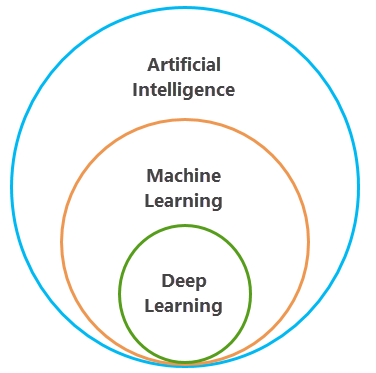

### Definición del Aprendizaje Automático

> *El estudio de métodos que 'aprenden', es decir, métodos que utilizan datos para mejorar el rendimiento de algún conjunto de tareas.*

> *Los algoritmos de aprendizaje automático construyen un modelo basado en datos de muestra, conocidos como datos de entrenamiento, para hacer predicciones o decisiones **sin estar programados explícitamente para hacerlo**.*

### Tipos de modelos de Aprendizaje Automático
Hay otros como por ejemplo el aprendizaje por refuerzo (Reinforcement Learning)

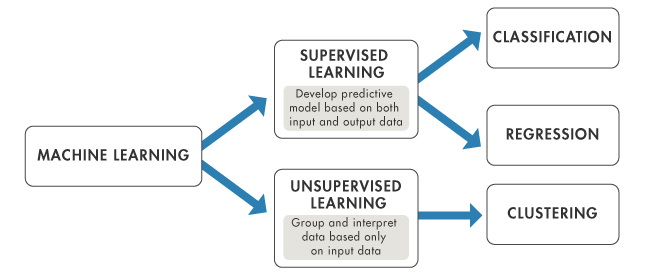





### Ejemplos de Supervised learning

- Tenemos datos **etiquetados**.




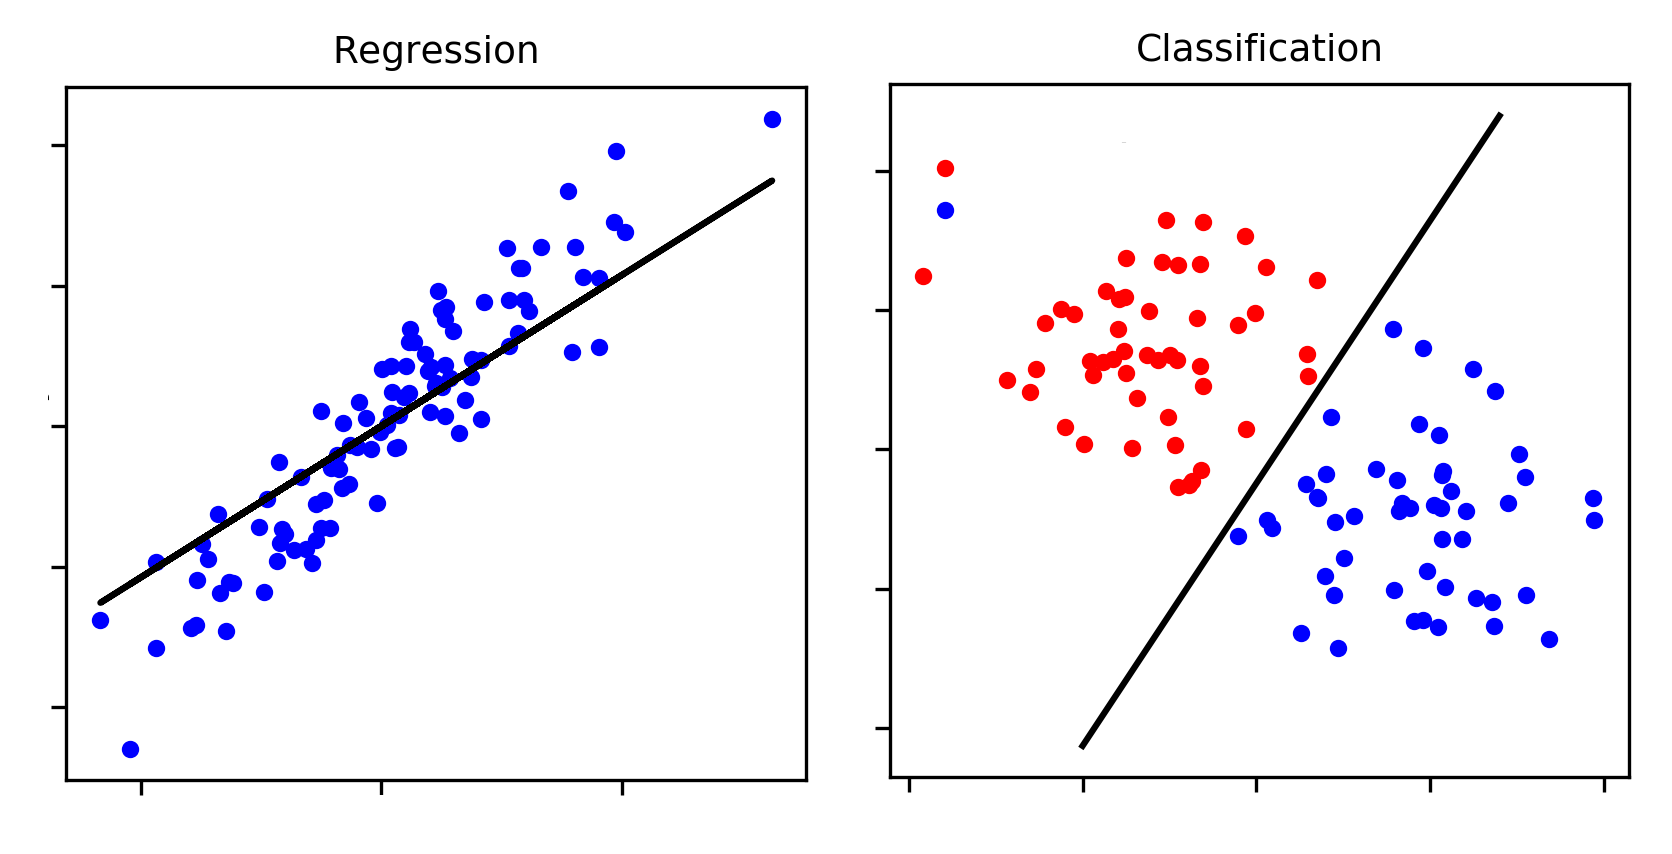



### Unsupervised vs Supervised learning

- Tenemos datos **no etiquetados**

<br>
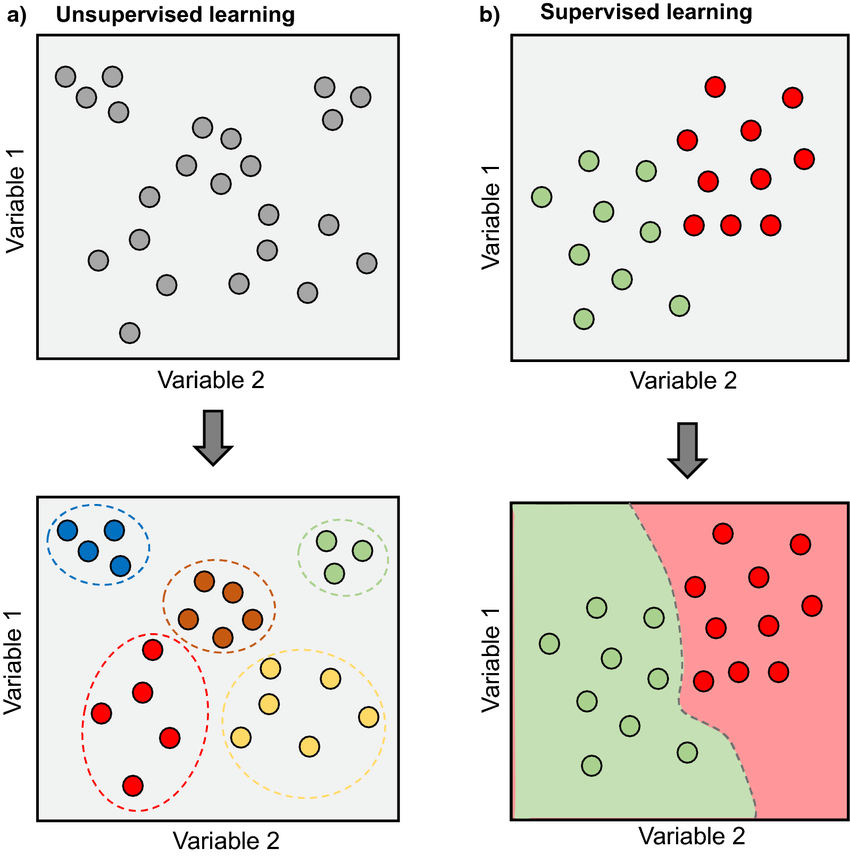

## Explicación inicial

Intentar predecir una función secreta

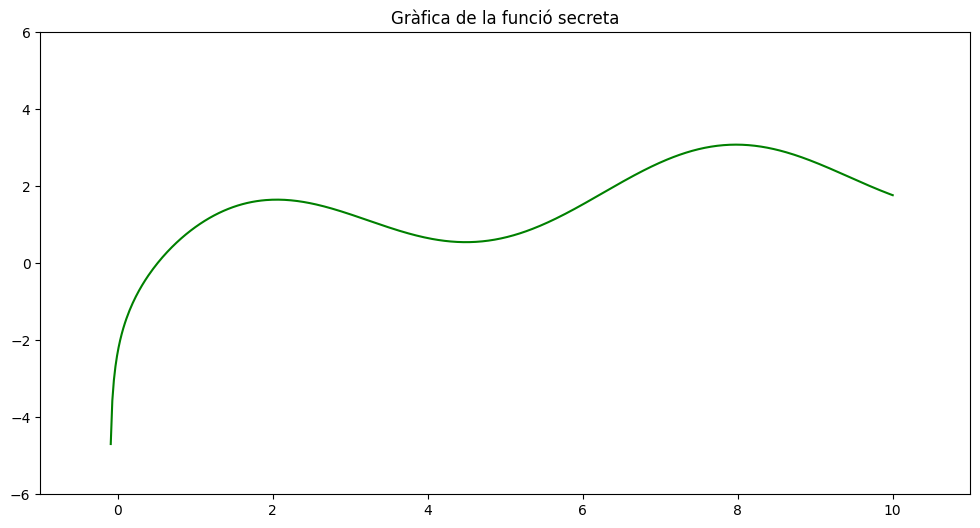

In [ ]:
rng = np.random.RandomState(0)
def magicFunction(x, noise=False):
  y = np.sin(x) + np.log(x+0.1)  # SECRET FUNCTION
  y = y + (0.5 * (rng.randn(len(x))-0.5)*2 if noise else 0)
  return y

fig, ax = plt.subplots(figsize=(12,6))
xspace = np.linspace(-0.09,10,500)
realY = magicFunction(xspace)
plt.plot(xspace,realY,c="green")
plt.ylim((-6,6))
plt.xlim((-1,11))
plt.title("Gráfica de la función secreta")
plt.show()

Muestras con un poco de ruido (el mundo no es perfecto y las mediciones, por lo tanto, tampoco)

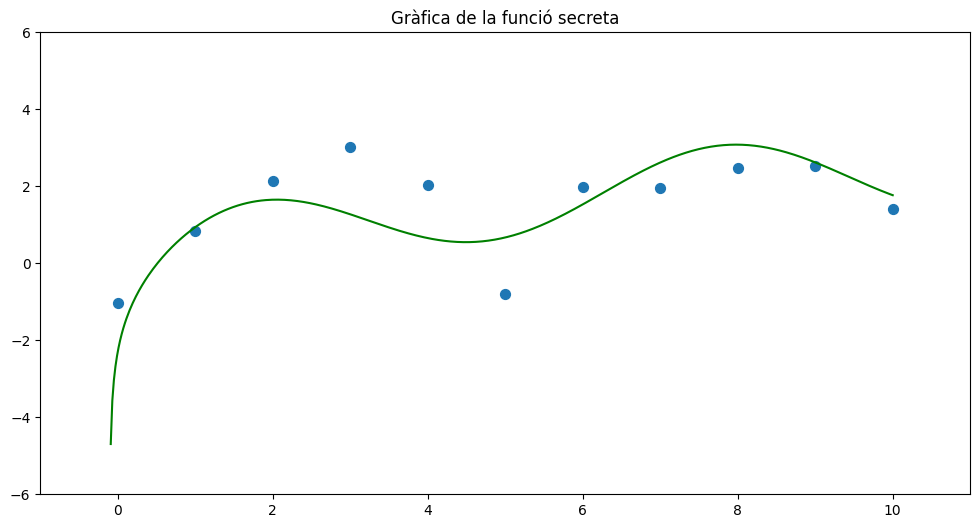

In [ ]:
x = np.arange(0,11,1)
y = magicFunction(x, noise=True)
fig, ax = plt.subplots(figsize=(12,6))
scatter = plt.scatter(x, y, s=50)
plt.plot(xspace,realY,c="green")
plt.ylim((-6,6))
plt.xlim((-1,11))
plt.title("Gráfica de la función secreta")
plt.show()

Entrenar un model lineal per obtenir una bona predicció de les dades

In [ ]:
def trainAndScore(x, y, grau=0):
  X = pd.DataFrame(x)
  Y = pd.DataFrame(y)
  poly = PolynomialFeatures(grau)
  x = poly.fit_transform(X)
  reg = LinearRegression().fit(x, Y)
  scoreTrain = round(reg.score(x,Y)*100,2)
  xspacePoly = poly.fit_transform(pd.DataFrame(xspace))
  scoreTest = round(reg.score(xspacePoly,realY)*100,2)
  addends = []
  for pow, coef in zip(poly.powers_, reg.coef_[0]):
    valuesPowered = [xspace**val for val in pow if val != 0]
    if len(valuesPowered) == 0: continue
    addends.append(np.prod(valuesPowered,axis=0)*coef)
  if len(addends) == 0:
    addends = np.zeros(len(xspace))
  elif len(addends) == 1:
    addends = addends[0]
  else:
    addends = np.sum(addends, axis=0)
  y = addends + reg.intercept_

  plt.subplots(figsize=(12,6))
  plt.scatter(X, Y, s=50, label="Data with noise")
  plt.plot(xspace,realY,c="green",label="Real")
  plt.plot(xspace,y,c="red",label="Fitted")
  plt.ylim((-6,6))
  plt.xlim((-1,11))
  plt.title(f"Entrenamiento con grado {grau}\nR2 entrenamiento = {scoreTrain}\nR2 test = {scoreTest}")
  plt.legend()
  plt.show()

interact(trainAndScore, grau=widgets.IntSlider(min=0, max=10, step=1, value=0), x=fixed(x), y=fixed(y))

interactive(children=(IntSlider(value=0, description='grau', max=10), Output()), _dom_classes=('widget-interac…

<function __main__.trainAndScore(x, y, grau=0)>

### Overfitting

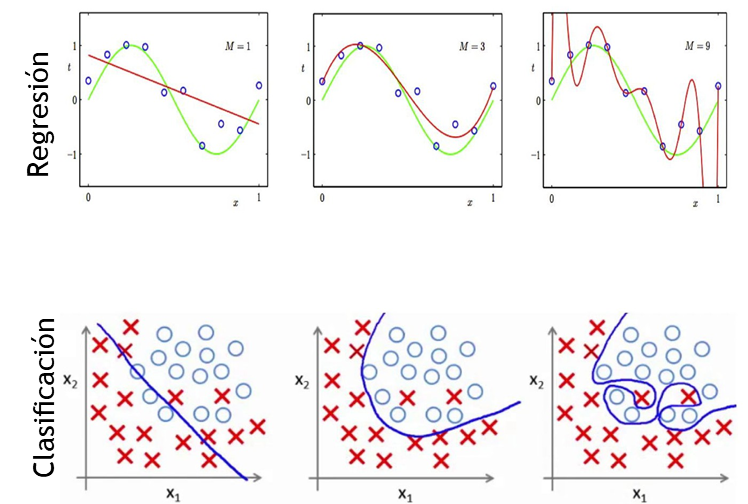

## Ejemplo. Detección de cáncer con dataset sencillo


### Obtener los datos y su descripción

In [ ]:
breastCancerDataset = load_breast_cancer(as_frame=True)
df = breastCancerDataset.frame
X = breastCancerDataset.data
Y = breastCancerDataset.target
print("BREAST DATASET DESCRIPTION\n\n", breastCancerDataset.DESCR)

BREAST DATASET DESCRIPTION

 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For i

### Visualizar los datos de forma independiente

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<ipython-input-49-66c41e189f63>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



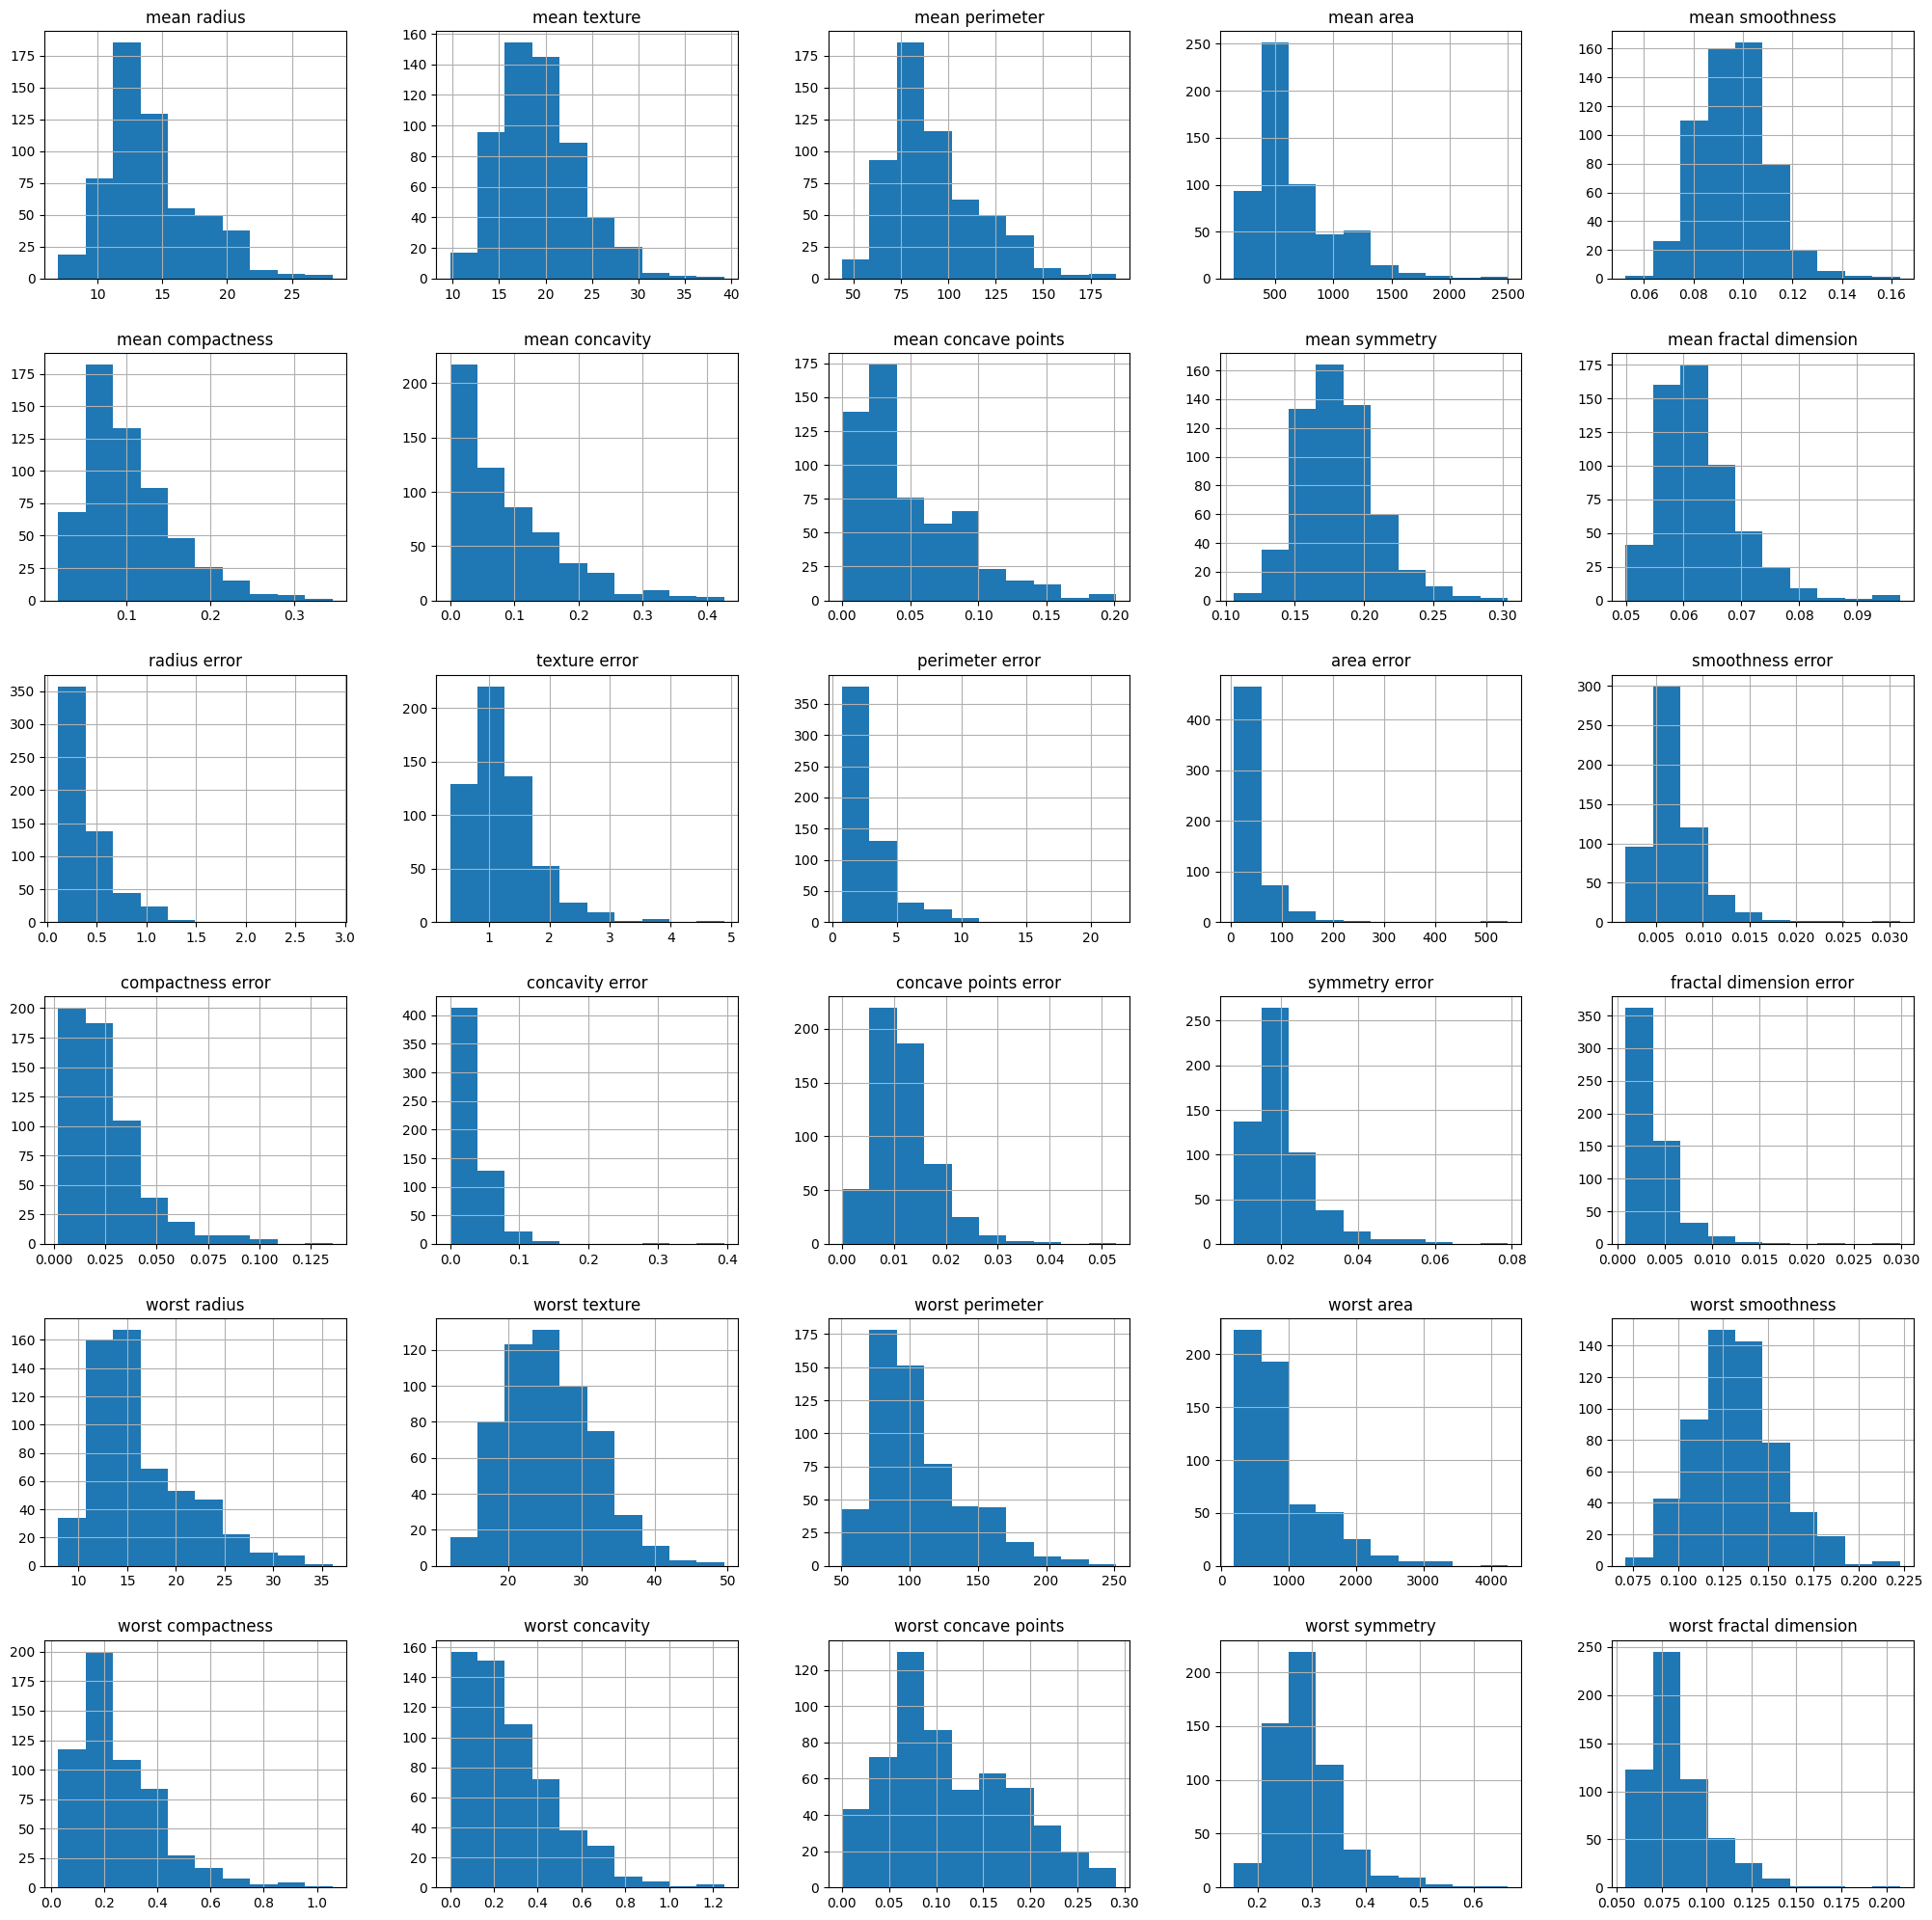

In [ ]:
_, ax = plt.subplots(figsize=(25, 25))
X.hist(ax=ax)
plt.show()

### Revisión estadística de los datos

#### Correlación

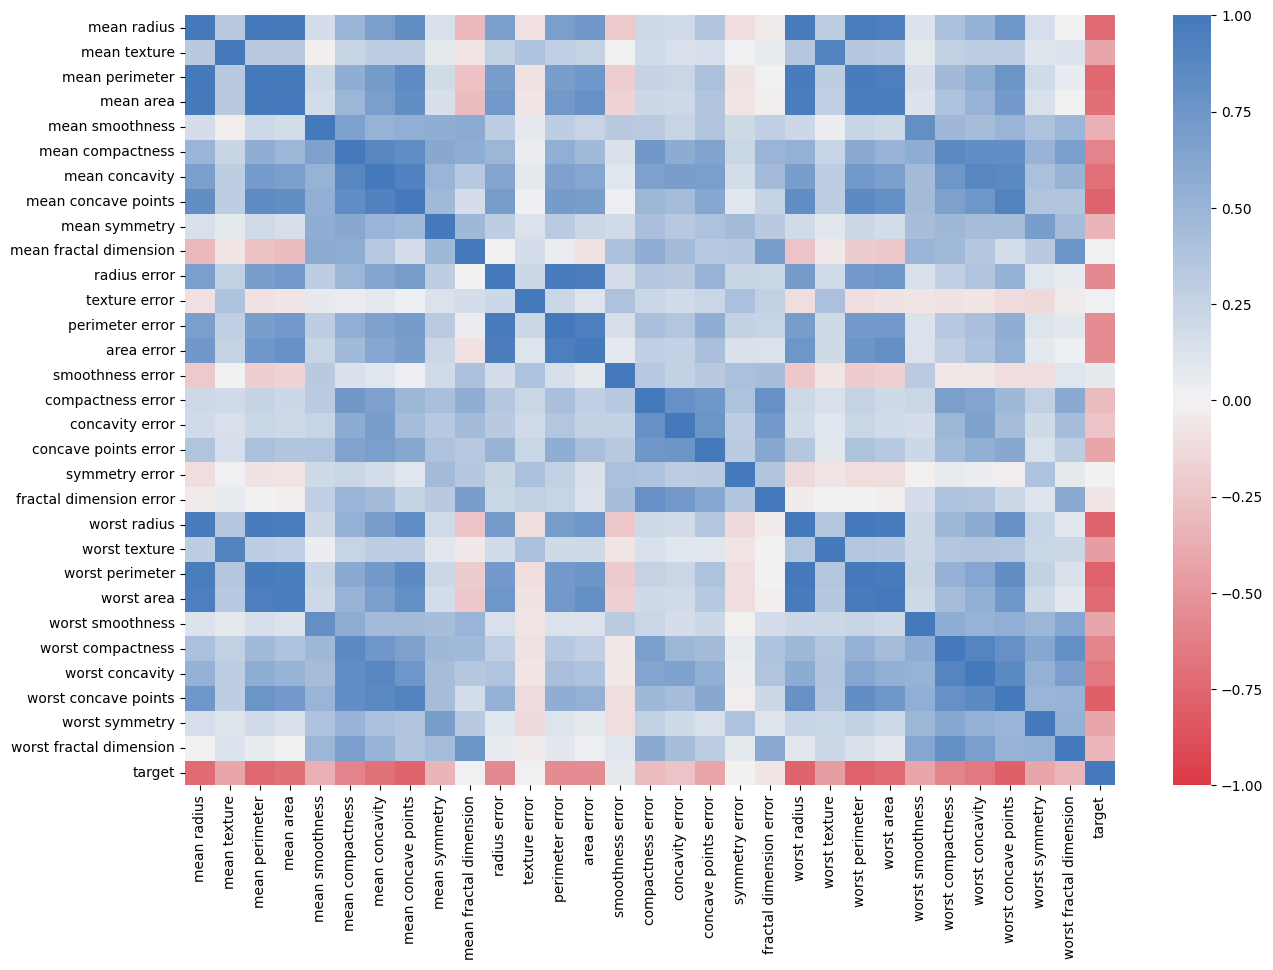

In [ ]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1)
plt.show()

#### Correlación en valor absoluto

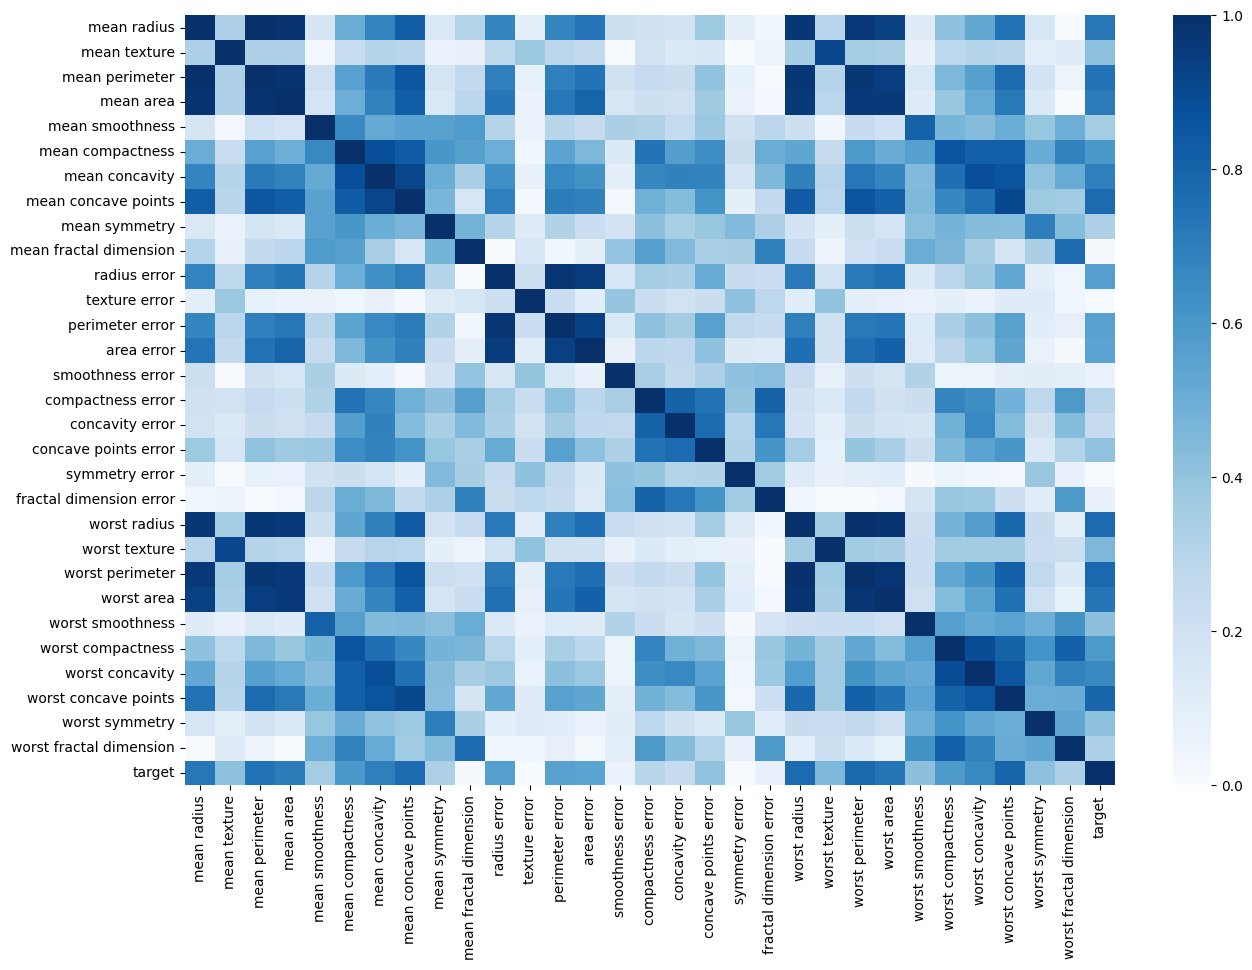

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap="Blues", vmin=0, vmax=1)
plt.show()

### Separar los datos

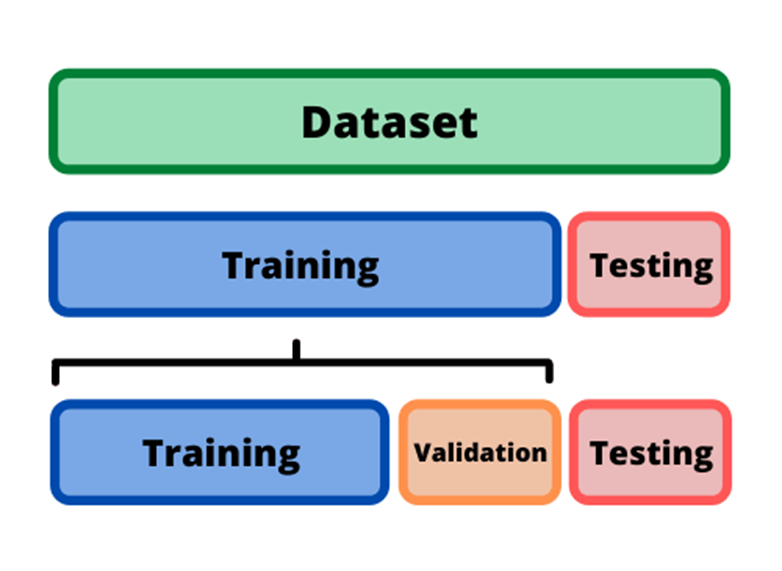

Esto es importante porque, como hemos visto al principio, podemos hacer que un modelo se adapte exactamente a unos datos concretos, pero así, perdiendo una buena predicción para el resto de puntos. Por tanto, en general, en el Aprendizaje Supervisado, se hace una división de los datos para que sepamos si estamos sobreentrenando un modelo y solo estamos capturando la información de los datos de entrenamiento. Podremos controlar el overfitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print(f"Tamaño del dataset = {len(X)} filas\nTamaño del train = {len(X_train)} filas\nTamaño del test = {len(X_test)} filas")

Tamany del dataset = 569 files
Tamany del train = 455 files
Tamany del test = 114 files


### Estandarizar o normalizar los datos

¿Por qué es necesario esto? Si dejamos los datos originales, las variables diferentes tendrán rangos diferentes. Por tanto, dependiendo de la magnitud de la variable, afectará más o menos a la predicción (porque afectará más a los pesos durante el entrenamiento). Como queremos, a priori, que todas las variables se vuelvan igualmente importantes, normalizaremos los datos para cada una de las columnas.

In [ ]:
scalerX = MinMaxScaler(feature_range=(0,1))
X_trainScaledArray = scalerX.fit_transform(X_train)
X_testScaledArray = scalerX.transform(X_test)
# El scaler retorna numpy arrays, por lo tanto, reconstruimos el dataset X
X_trainScaled = pd.DataFrame(X_trainScaledArray, columns=X.columns)
X_testScaled = pd.DataFrame(X_testScaledArray, columns=X.columns)
X_trainScaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.158029,0.224552,0.148711,0.077011,0.387273,0.093737,0.023711,0.027311,0.416667,0.253791,...,0.131746,0.259861,0.115769,0.061507,0.389391,0.059309,0.035016,0.081821,0.219988,0.124295
1,0.624686,0.332432,0.622003,0.469752,0.617958,0.397276,0.499766,0.625746,0.335354,0.222620,...,0.559524,0.347814,0.534351,0.398485,0.647490,0.258957,0.423962,0.746735,0.289178,0.168634
2,0.174121,0.183970,0.163776,0.087497,0.309162,0.072511,0.000000,0.000000,0.438384,0.206192,...,0.143254,0.191365,0.127397,0.068714,0.247436,0.039410,0.000000,0.000000,0.225705,0.043290
3,0.311373,0.141698,0.309585,0.177372,0.518190,0.306178,0.184161,0.221223,0.455556,0.275274,...,0.279762,0.136194,0.283358,0.154429,0.451199,0.235284,0.205831,0.312371,0.295683,0.175325
4,0.207724,0.310450,0.196116,0.107196,0.299550,0.094166,0.056209,0.108002,0.481313,0.201980,...,0.175794,0.376333,0.161440,0.084422,0.275963,0.067711,0.060136,0.213162,0.335502,0.097731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.392778,0.429489,0.380969,0.240756,0.341404,0.263235,0.125937,0.162177,0.336869,0.278222,...,0.391667,0.426706,0.354352,0.242670,0.400258,0.293594,0.289936,0.421306,0.317366,0.279942
451,0.593923,0.310788,0.592288,0.455742,0.638642,0.444206,0.514761,0.527833,0.369697,0.327717,...,0.714286,0.378998,0.674660,0.575274,0.532025,0.372859,0.488898,0.680412,0.276562,0.290240
452,0.401297,0.481569,0.414691,0.249544,0.678793,0.514140,0.475633,0.423459,0.377273,0.439553,...,0.364286,0.647921,0.376153,0.223050,0.692997,0.455424,0.472125,0.743299,0.285433,0.338843
453,0.476549,0.316875,0.481031,0.319041,0.627692,0.422735,0.447516,0.541750,0.540909,0.279907,...,0.462698,0.343017,0.464475,0.309166,0.673300,0.355202,0.400799,0.873883,0.304356,0.233307


### PCA: Reducción de dimensionalidad
Permite una visualización espacial general

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_trainScaled)
X_test_pca = pca.transform(X_testScaled)

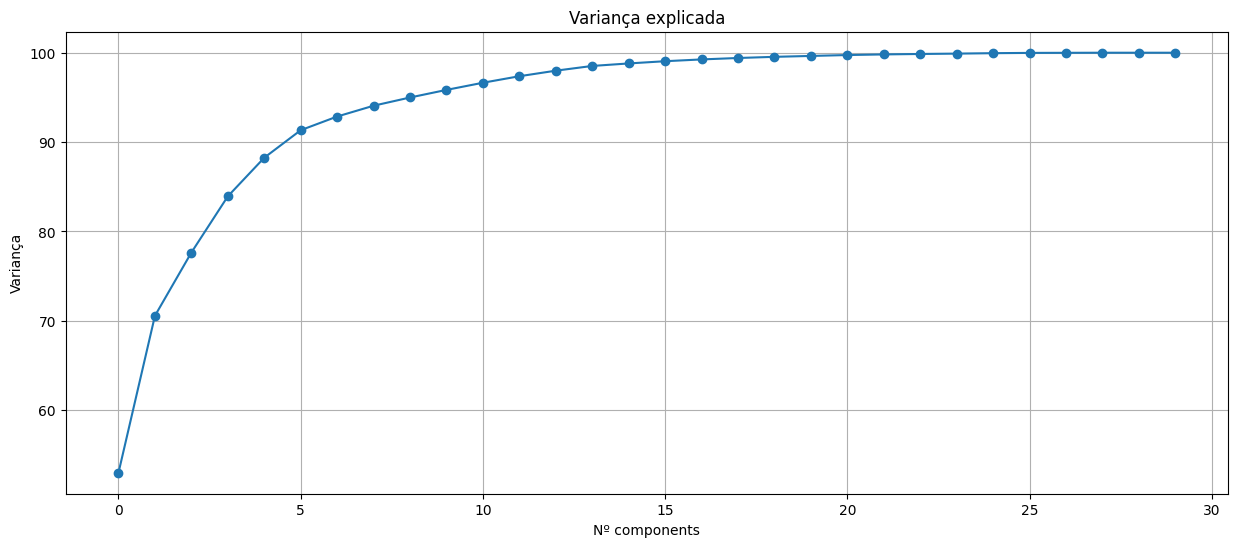

In [ ]:
explainedVariance = np.round(np.cumsum(pca.explained_variance_ratio_)*100,2)
plt.figure(figsize=(15,6))
plt.plot(explainedVariance, "-o")
plt.title("Varianza explicada")
plt.xlabel("Nº componentes")
plt.ylabel("Varianza")
plt.grid()
plt.show()

Es decir, con solo 5 componentes ya explicamos más del 90% de la varianza de los datos.

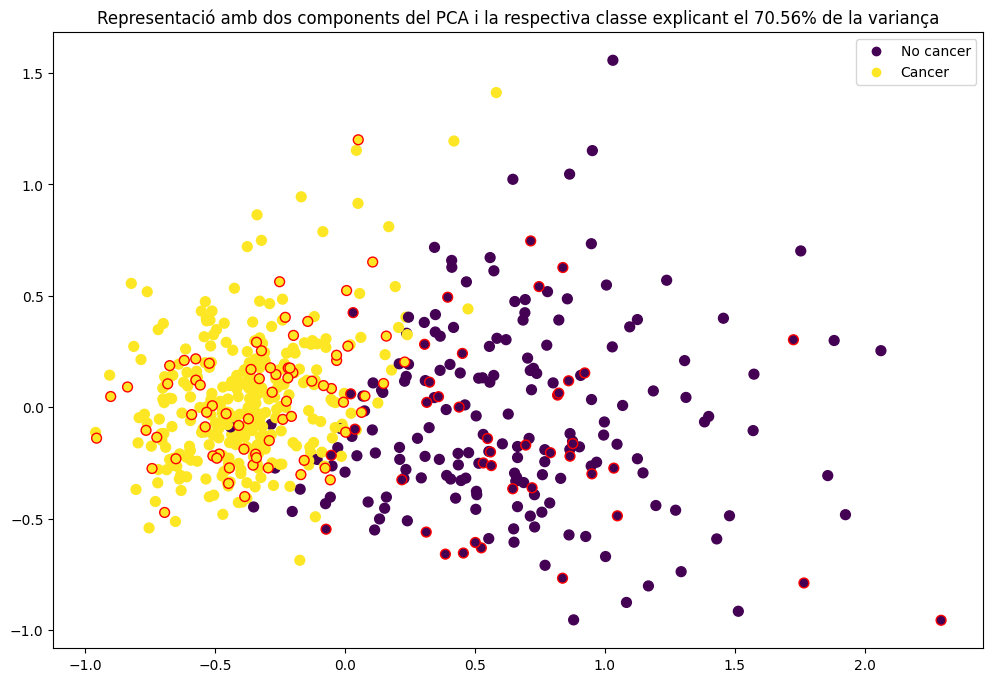

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=50, c=y_train)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], s=50, c=y_test, edgecolors='red')
plt.title(f"Representación con dos componentes del PCA y la respectiva clase explicando el {explainedVariance[1]}% de la varianza")
plt.legend(handles=scatter.legend_elements()[0], labels=["No cancer", "Cancer"])
plt.show()

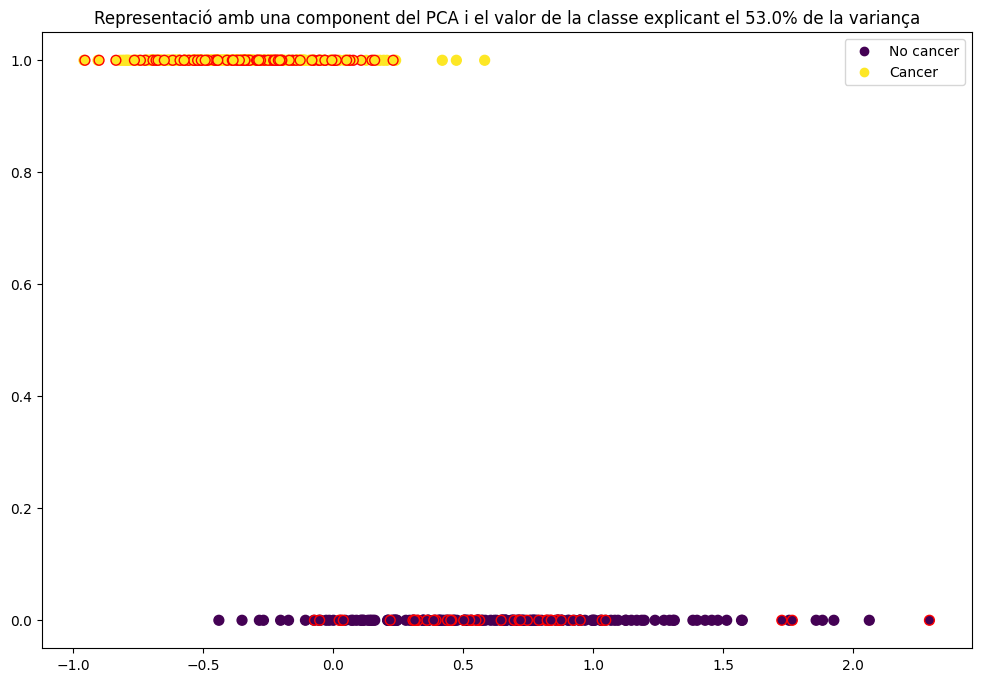

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
scatter = plt.scatter(X_train_pca[:,0], y_train, s=50, c=y_train)
plt.scatter(X_test_pca[:,0], y_test, s=50, c=y_test, edgecolors='red')
plt.title(f"Representación con una componente del PCA y el valor de la clase explicando el {explainedVariance[0]}% de la varianza")
plt.legend(handles=scatter.legend_elements()[0], labels=["No cancer", "Cancer"])
plt.show()

### Entrenamientos

#### Usando la primera componente del PCA

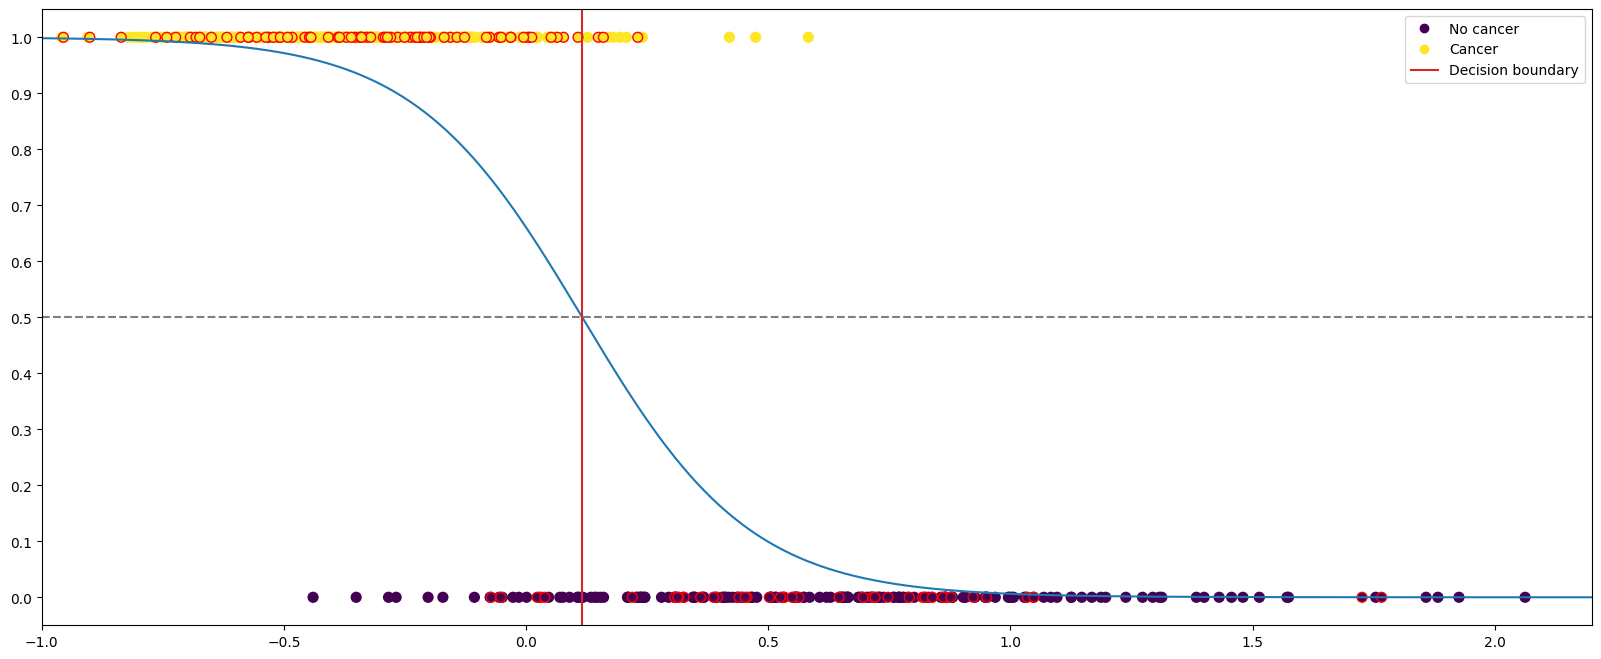

In [ ]:
reg = LogisticRegression()
reg.fit(X_train_pca[:,:1], y_train)
y_trainPred = reg.predict(X_train_pca[:,:1])
y_testPred = reg.predict(X_test_pca[:,:1])
x = np.linspace(-2, 3, num=1000)
loss = expit(x * reg.coef_ + reg.intercept_).ravel()
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(x, loss, label="Logistic fitted function")
plt.axhline(0.5, ls="--",color="tab:gray")
axline = plt.axvline((logit(0.5)-reg.intercept_)/reg.coef_, color="tab:red")
scatter = plt.scatter(X_train_pca[:,0], y_train, s=50, c=y_train)
plt.scatter(X_test_pca[:,0], y_test, s=50, c=y_test, edgecolors='red')
plt.legend(handles=scatter.legend_elements()[0]+[axline], labels=["No cancer", "Cancer", "Decision boundary"])
plt.xlim(-1,2.2)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

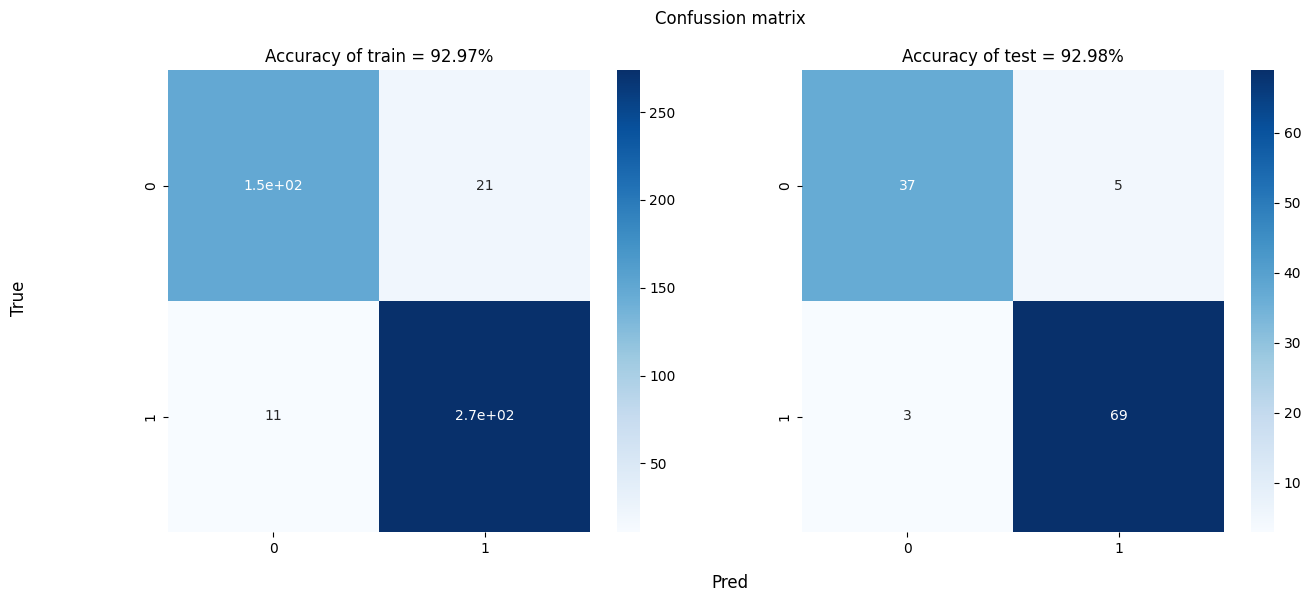

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
sns.heatmap(confusion_matrix(y_train,y_trainPred), annot=True, cmap="Blues", ax=ax1)
sns.heatmap(confusion_matrix(y_test,y_testPred), annot=True, cmap="Blues", ax=ax2)
trainScore = round(reg.score(X_train_pca[:,:1], y_train)*100,2)
testScore = round(reg.score(X_test_pca[:,:1], y_test)*100,2)
plt.suptitle(f"Confussion matrix")
ax1.set_title(f"Accuracy of train = {trainScore}%")
ax2.set_title(f"Accuracy of test = {testScore}%")
fig.supylabel('True')
fig.supxlabel("Pred")
plt.show()

#### Usando dos componentes y modelos más potentes

In [ ]:
def func(value,model):
  X = X_train_pca[:,:2]
  if model == "DecisionTree":
    model = DecisionTreeClassifier(max_depth=value)
  elif model == "SVC poly":
    model = SVC(kernel="poly", degree=value)
  else:
    model = SVC(C=10**(value-5))

  model.fit(X, y_train)
  trainScore = round(model.score(X_train_pca[:,:2], y_train)*100,2)
  testScore = round(model.score(X_test_pca[:,:2], y_test)*100,2)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  plot_step = 0.01
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  plt.figure(figsize=(12,6))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)
  scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=50, c=y_train)
  plt.scatter(X_test_pca[:,0], X_test_pca[:,1], s=50, c=y_test, edgecolors='red')
  plt.ylim((-1,1.75))
  plt.xlim((-1,2.5))
  text = "polinomio de grado" if model == "SVC poly" else ("C de" if model!="SVC poly" else "profundidad de")
  plt.title(f"Representación con dos componentes del PCA y la respectiva clase explicando el {explainedVariance[1]}% de la varianza\n"+\
            f"Modelo elegido = {model} con {text} {value}\n"+\
            f"Precisión de entrenamiento = {trainScore}% y Precisión de test = {testScore}%")
  plt.legend(handles=scatter.legend_elements()[0], labels=["No cancer", "Cancer"])
  plt.show()
interact(func, value=widgets.IntSlider(min=1, max=15, step=1), model=["DecisionTree","SVC poly","SVC rbf"])

interactive(children=(IntSlider(value=1, description='value', max=15, min=1), Dropdown(description='model', op…

<function __main__.func(value, model)>

#### Impacto de la cantidad de componentes del PCA usadas

Valores de los modelos por defecto

In [ ]:
def classifier(modelName):
  model = LogisticRegression()
  if modelName == "SVC poly":
    model = SVC(kernel="poly")
  elif modelName == "Tree":
    model = DecisionTreeClassifier(max_depth=None) # Default
  elif modelName == "SVC rbf":
    model = SVC()

  errorsTrain, errorsTest = [], []
  for num_components in range(1,len(X_train_pca[0])):
    model.fit(X_train_pca[:,:num_components], y_train)
    trainScore = round(model.score(X_train_pca[:,:num_components], y_train)*100,2)
    testScore = round(model.score(X_test_pca[:,:num_components], y_test)*100,2)
    errorsTrain.append(trainScore)
    errorsTest.append(testScore)

  plt.figure(figsize=(10,6))
  plt.plot(range(1,len(X_train_pca[0])), errorsTrain,"-o",c="red",label="Train")
  plt.plot(range(1,len(X_train_pca[0])), errorsTest,"-o",c="blue",label="Test")
  plt.title(f"Evolución del error dependiendo del número de componentes utilizadas en el entrenamiento\nModelo = {model}")
  plt.ylabel("Precisión")
  plt.xlabel("Número de componentes")
  plt.xticks(range(1,len(X_train_pca[0])))
  plt.legend()
  plt.grid()
  plt.show()

interact(classifier, modelName=["Logistic","Tree","SVC poly","SVC rbf"])

interactive(children=(Dropdown(description='modelName', options=('Logistic', 'Tree', 'SVC poly', 'SVC rbf'), v…

<function __main__.classifier(modelName)>

#### Usando los datos originales
(no podemos visualizarlo)

In [ ]:
def classifier(modelName):
  model = LogisticRegression()
  if modelName == "SVC rbf":
    model = SVC()
  elif modelName == "Tree":
    model = DecisionTreeClassifier()
  elif modelName == "SVC poly":
    model = SVC(kernel="poly")

  model.fit(X_trainScaled, y_train)
  Y_trainPred = model.predict(X_trainScaled)
  Y_testPred = model.predict(X_testScaled)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
  sns.heatmap(confusion_matrix(y_train,Y_trainPred), annot=True, cmap="Blues", ax=ax1)
  sns.heatmap(confusion_matrix(y_test,Y_testPred), annot=True, cmap="Blues", ax=ax2)
  trainScore = round(model.score(X_trainScaled, y_train)*100,2)
  testScore = round(model.score(X_testScaled, y_test)*100,2)
  plt.suptitle(f"Confussion matrixs of the model = {model}")
  ax1.set_title(f"Accuracy of train = {trainScore}%")
  ax2.set_title(f"Accuracy of test = {testScore}%")
  fig.supylabel('True')
  fig.supxlabel("Pred")
  plt.show()

interact(classifier, modelName=["Logistic","Tree","SVC rbf", "SVC poly"])

interactive(children=(Dropdown(description='modelName', options=('Logistic', 'Tree', 'SVC rbf', 'SVC poly'), v…

<function __main__.classifier(modelName)>

---

## Práctica a realizar

Completa esta práctica llenando los espacios con el código indicado con @. También, responde a las preguntas correspondientes.

In [ ]:
diabetesDataset = load_diabetes(as_frame=True, scaled=False)
df = diabetesDataset.frame
X = diabetesDataset.data
Y = diabetesDataset.target

1. ¿Es un problema de regresión o de clasificación? @

In [ ]:
print("DIABETES DATASET DESCRIPTION\n\n", @)

¿Cuál es la variable con un rango mayor y un rango menor (los histogramas u operaciones sobre el conjunto de datos podrían ayudar)? @

¿Hay alguna variable categórica/binaria? @

2. Obtén la matriz de correlación en valor absoluto.

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(@, cmap="Blues", vmin=0, vmax=1)
plt.show()

3. ¿Qué variable está más correlacionada con la variable objetivo? @

4. ¿Por qué es, en general, estrictamente necesario separar los datos? @

5. Separa los datos en train y test, haz que el test tenga un 33% de los datos totales.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(@, @, test_size=@, random_state=0)
print(f"Tamany del dataset = {len(X)} files\nTamany del train = {len(X_train)} files\nTamany del test = {len(X_test)} files")

6. Estandariza los datos usando el [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
scalerX = @
X_trainScaledArray = scalerX.fit_transform(@)
X_testScaledArray = scalerX.transform(@)
# El scaler retorna numpy arrays, por lo tanto, reconstruimos el dataset X
X_trainScaled = pd.DataFrame(X_trainScaledArray, columns=X.columns)
X_testScaled = pd.DataFrame(X_testScaledArray, columns=X.columns)
X_trainScaled

7. Aplica un PCA sobre los datos

In [ ]:
pca = @
X_train_pca = pca.fit_transform(@)
X_test_pca = pca.transform(@)

8. ¿Cuál es la varianza explicada usando 4 componentes?

In [ ]:
explainedVarianceWith4Components = @
print(f"La varianza explicada usando 4 componentes es {explainedVarianceWith4Components*100}%")

9. Dibuja en 2 o 3 dimensiones (puedes elegir) las 2 o 3 componentes principales del PCA.

In [ ]:
# Dos dimensiones
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(@, @, s=50, label="Train")
plt.scatter(@, @, s=50, label="Test")
plt.title(f"Representación con dos componentes del PCA")
plt.legend()
plt.show()

In [ ]:
# Tres dimensiones
fig = go.Figure(data=
  [
    go.Scatter3d(x=@, y=@, z=@, mode='markers', marker=dict(color='orange'), name='Train'),
    go.Scatter3d(x=@, y=@, z=@, mode='markers', marker=dict(color='cyan'), name='Test')
  ])
fig.update_layout(title='Representación con tres componentes del PCA', scene=dict(aspectmode="cube"))
fig.show()

10. Entrena un modelo de regresión lineal ([LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) sobre los datos reducidos a una cierta dimensión.

In [ ]:
n_dimensions = @ #Valor a elegir por vosotros
reg = LinearRegression().fit(X_train_pca[:,:@], y_train)
scoreTrain = reg.score(X_train_pca[:,:@], @)
scoreTest = reg.score(X_test_pca[:,:@], @)

print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

11. Mejora el modelo añadiendo [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) con un grado variable.

In [ ]:
grau = @ #Valor a triar per vosaltres
n_dimensions = @ #Valor a triar per vosaltres
poly = PolynomialFeatures(grau)
xTrain = poly.fit_transform(X_train_pca[:,:@])
xTest = poly.transform(X_test_pca[:,:@])
reg = LinearRegression().fit(xTrain, y_train)
scoreTrain = reg.score(xTrain, @)
scoreTest = reg.score(@, y_test)

print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

12. Haz que el grado y la dimensionalidad sean parámetros interactivos usando sliders.

> `grau` debe ir de 1 a 15 con pasos de 1.

In [ ]:
def func(n_dim, grau):
  poly = PolynomialFeatures(@)
  xTrain = poly.fit_transform(@)
  xTest = poly.transform(@)
  reg = LinearRegression().fit(xTrain, y_train)
  scoreTrain = @
  scoreTest = @

  print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}\n")
interact(func, n_dim=widgets.IntSlider(min=1, max=len(X_train_pca[0]), step=1), grau=@)

13. ¿Por qué la precisión es tan baja en test? @

14. Visualiza la recta de regresión en dos dimensiones (mantén la interactividad del slider con el grado de PolynomialFeatures)

In [ ]:
def func(grau):
  # Debemos dejar solo 1 dimensión para poder visualizar la predicción en 2 dimensiones
  n_dimensions = 1

  poly = @
  xTrain = poly.fit_transform(@)
  xTest = poly.transform(@)
  reg = LinearRegression().fit(@, @)
  scoreTrain = @
  scoreTest = @

  ### DO NOT TOUCH THIS BLOCK ###
  # Is just to get the line prediction #
  xspace = np.linspace(-1,1,1000)
  addends = []
  for pow, coef in zip(poly.powers_, reg.coef_):
    valuesPowered = [xspace**val for val in pow if val != 0]
    if len(valuesPowered) == 0: continue
    addends.append(np.prod(valuesPowered,axis=0)*coef)
  if len(addends) == 0:
    addends = np.zeros(len(xspace))
  elif len(addends) == 1:
    addends = addends[0]
  else:
    addends = np.sum(addends, axis=0)
  y = addends + reg.intercept_
  ### DO NOT TOUCH THIS BLOCK ###

  fig, ax = plt.subplots(figsize=(12,8))
  plt.scatter(@, y_train, s=50, label="Train")
  plt.scatter(@, y_test, s=50, label="Test")
  plt.plot(xspace,y,c="red")
  plt.title(f"Representación con una componente del PCA y polinomio con grado = {grau}\n"+
            f"Precisión de entrenamiento = {scoreTrain*100}. Precisión de test = {scoreTest*100}")
  plt.legend()
  plt.ylabel("Y")
  plt.ylim((0,375))
  plt.show()
interact(func, grau=widgets.IntSlider(min=1, max=24, step=1))

15. Prueba otros modelos como [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) o [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) con todas las componentes del PCA.

Nota cómo no siempre mejora usar modelos más potentes.

In [ ]:
svr = @.fit(@, y_train)
scoreTrain = svr.score(@, @)
scoreTest = svr.score(X_test_pca, y_test)
print(f"Accuracy amb {svr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

rfr = @.fit(X_train_pca, y_train)
scoreTrain = rfr.score(@, y_train)
scoreTest = rfr.score(X_test_pca, y_test)
print(f"Accuracy amb {rfr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

16. Prueba otros modelos como [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) o [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) con todos los datos escalados sin aplicar el PCA.

In [ ]:
svr = @.fit(X_trainScaled, @)
scoreTrain = svr.score(@, y_train)
scoreTest = svr.score(X_testScaled, @)
print(f"Accuracy amb {svr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

rfr = @.fit(@, y_train)
scoreTrain = rfr.score(X_trainScaled, @)
scoreTest = rfr.score(@, y_test)
print(f"Accuracy amb {rfr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

17. ¿Por qué los resultados no son perfectos? @

18. ¿Qué otro modelo podría funcionar muy bien en un problema como este de regresión? @

In [ ]:
diabetesDataset = load_diabetes(as_frame=True, scaled=False)
df = diabetesDataset.frame
X = diabetesDataset.data
Y = diabetesDataset.target

1. És un problema de regressió o de classificació? Regressió

In [ ]:
print("DIABETES DATASET DESCRIPTION\n\n", diabetesDataset.DESCR)

DIABETES DATASET DESCRIPTION

 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sug

Quines és la variable amb un rang major i un rang menor? La variable amb un rang major es s1 (de 100 a 300 aprox.). La variable amb un rang menor es sex i després s5.

Hi ha alguna variable categórica/binaria? Sí, sex.

<ipython-input-28-66c41e189f63>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=ax)


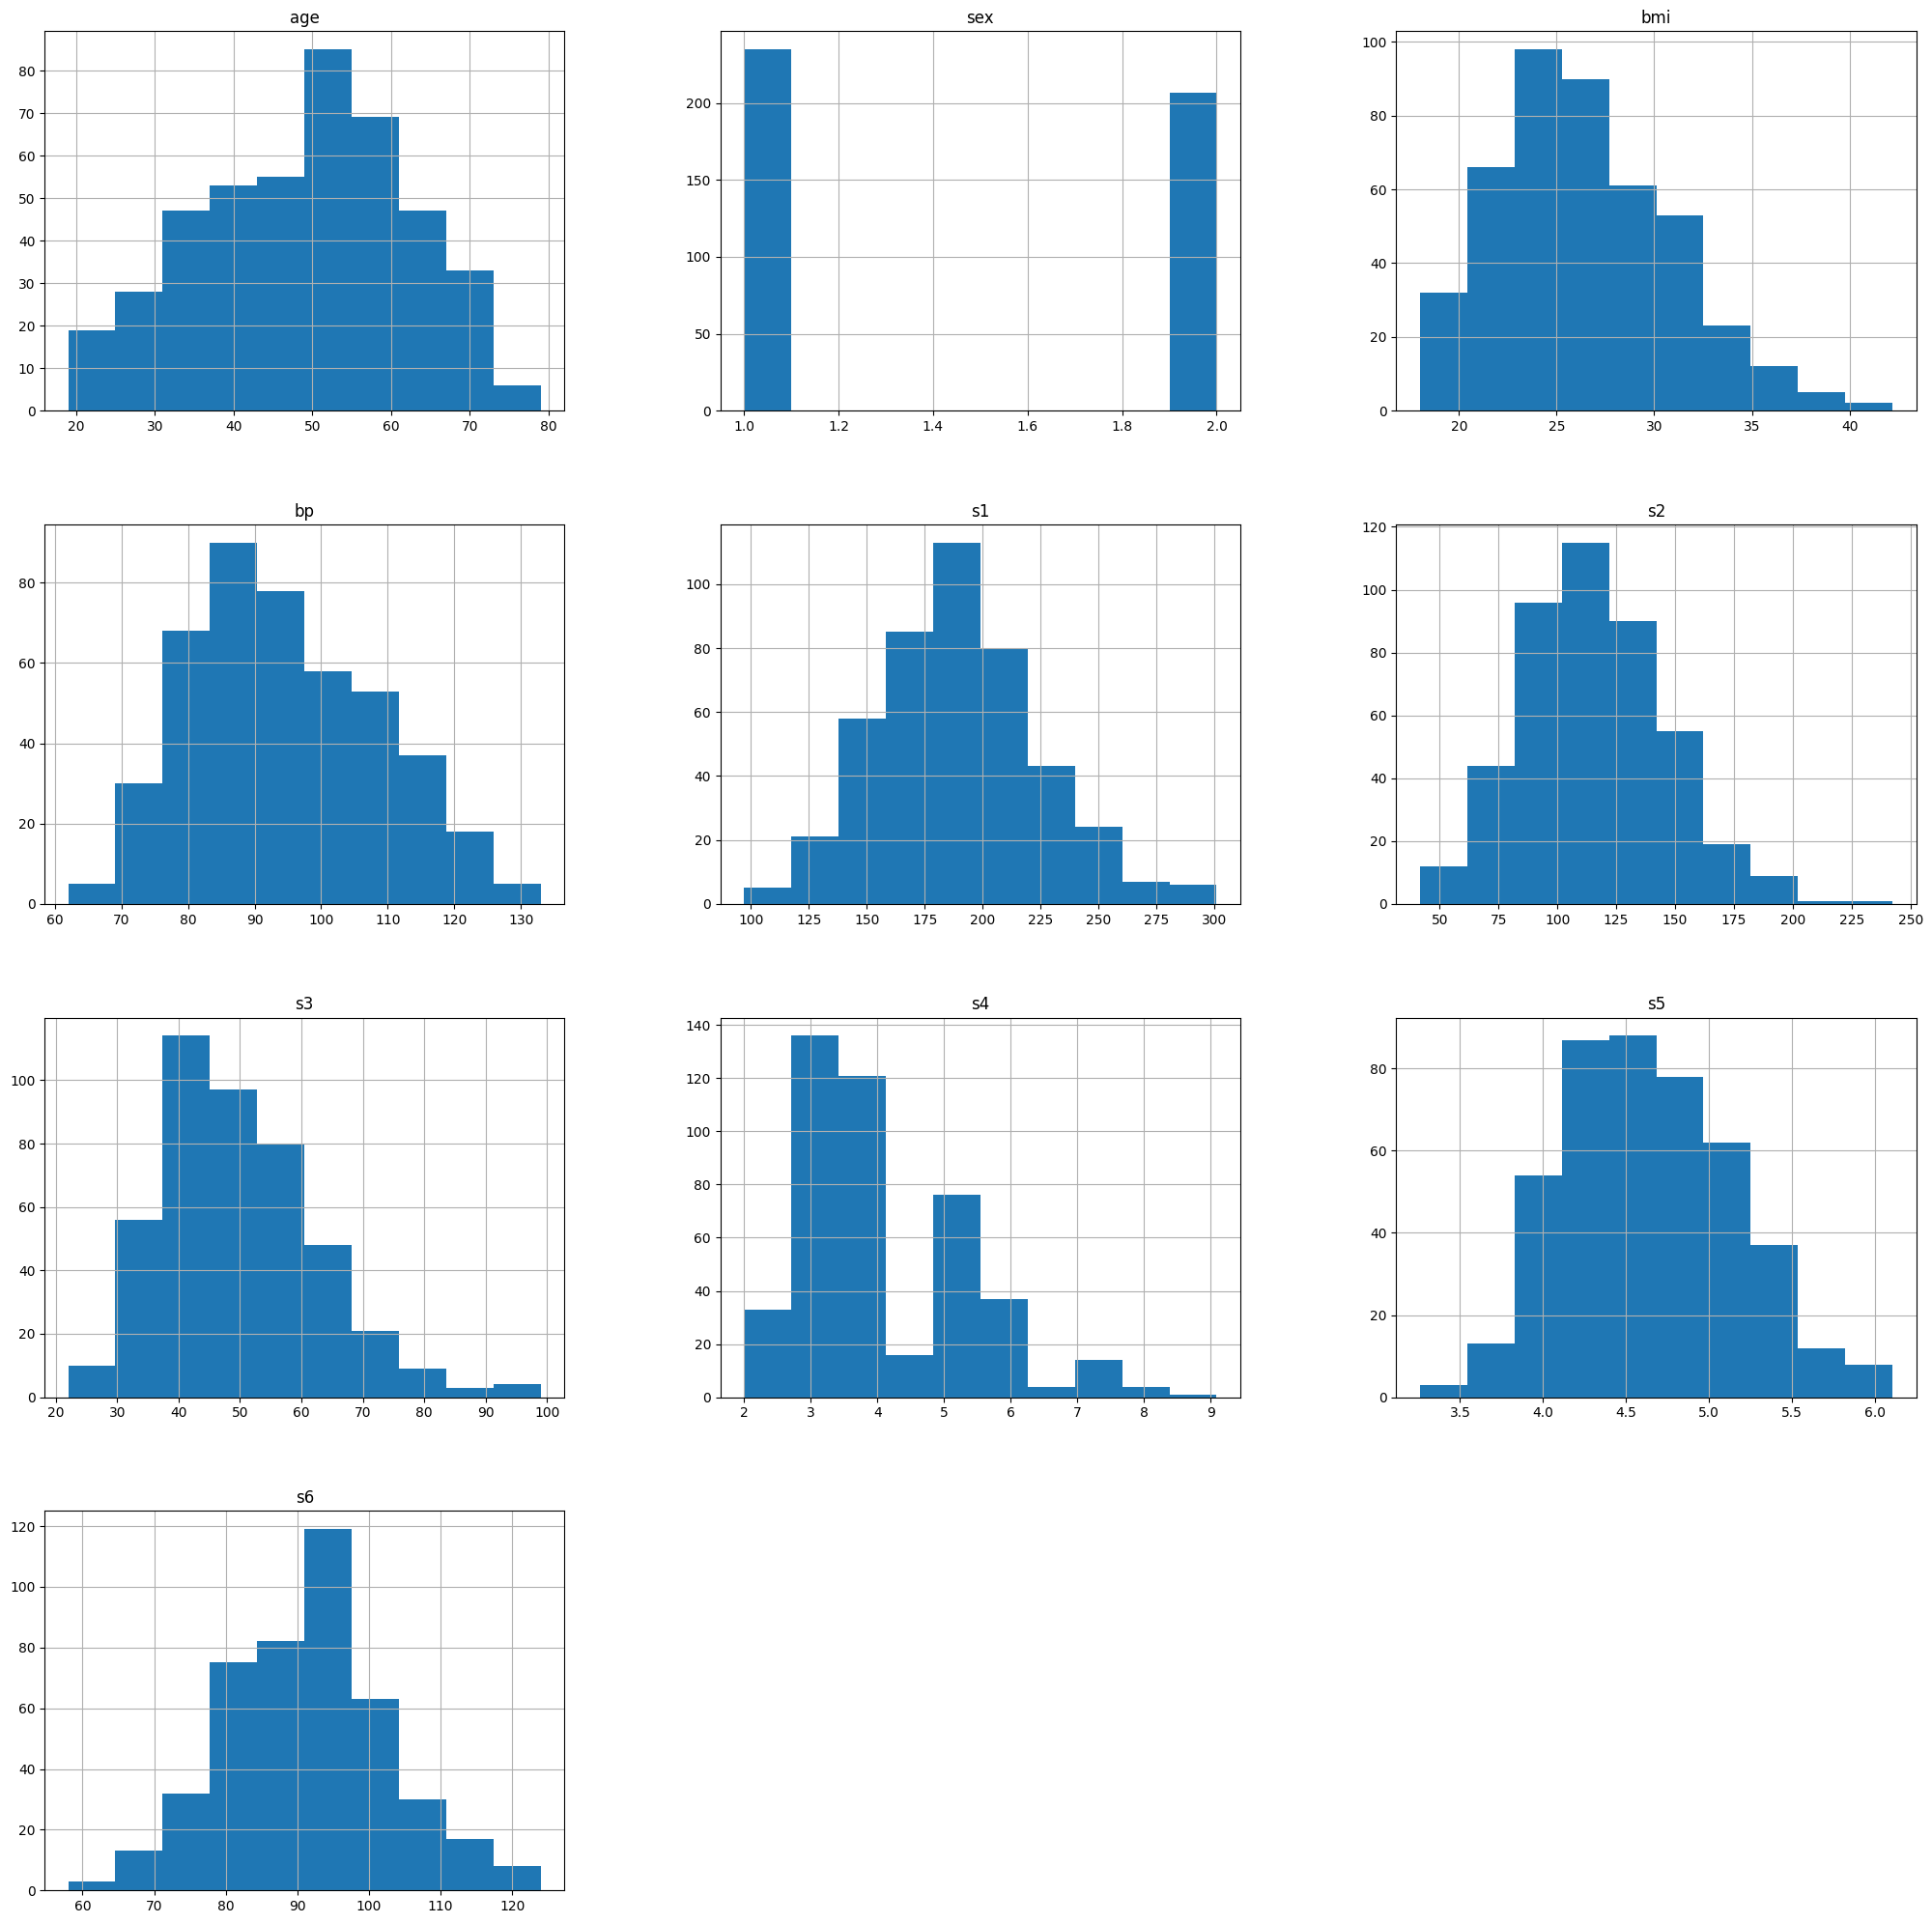

In [ ]:
_, ax = plt.subplots(figsize=(25, 25))
X.hist(ax=ax)
plt.show()

2. Obté la matriu de correlació



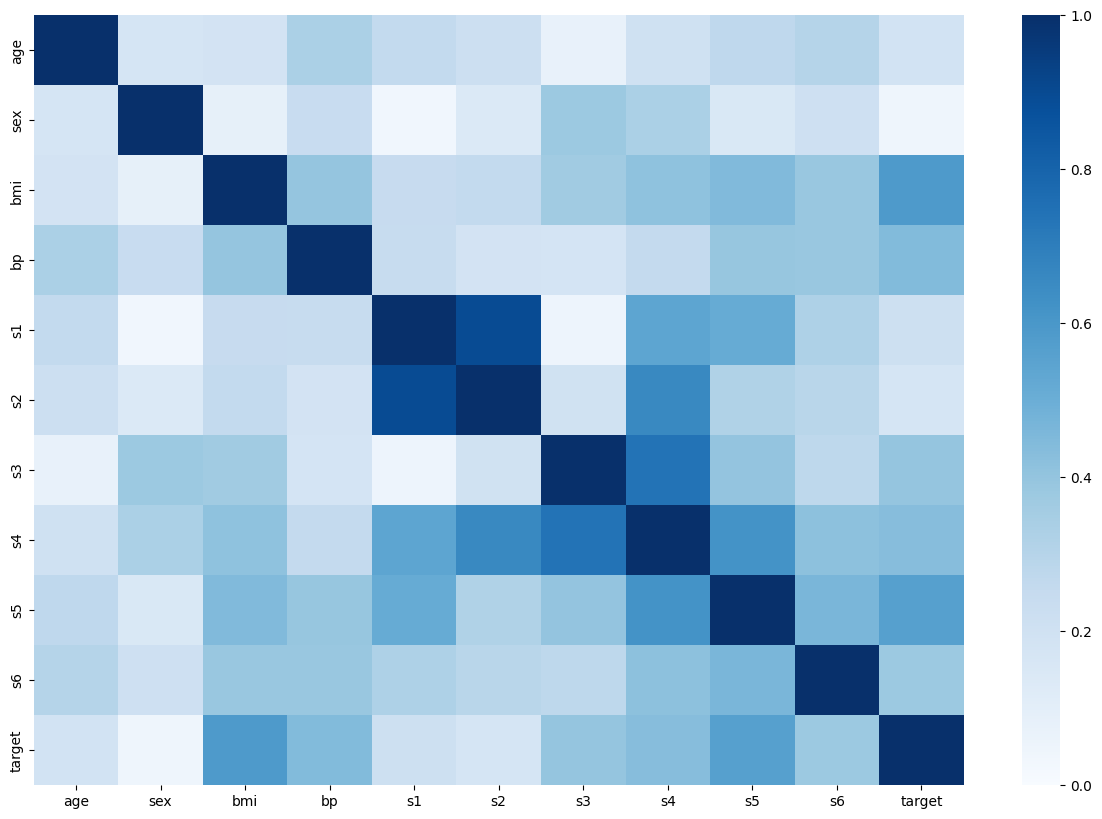

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap="Blues", vmin=0, vmax=1)
plt.show()

3. Quina variable esta més correlacionada amb la variable objectiu? La variable bmi

4. Perquè es estrictament necessari separar les dades? Per tenir una referència i saber si el model esta fent overfitting/underfitting.

5. Separa les dades en train i test, fes que el test tingui un 33% de les dades totals

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
print(f"Tamany del dataset = {len(X)} files\nTamany del train = {len(X_train)} files\nTamany del test = {len(X_test)} files")

Tamany del dataset = 442 files
Tamany del train = 296 files
Tamany del test = 146 files


6. Estandaritza les dades usant el [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
scalerX = MinMaxScaler()
X_trainScaledArray = scalerX.fit_transform(X_train)
X_testScaledArray = scalerX.transform(X_test)
# El scaler retorna numpy arrays, per tant, reconstruïm el dataset X
X_trainScaled = pd.DataFrame(X_trainScaledArray, columns=X.columns)
X_testScaled = pd.DataFrame(X_testScaledArray, columns=X.columns)
X_trainScaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.266667,0.0,0.080169,0.028571,0.403141,0.318725,0.584416,0.111425,0.357542,0.303030
1,0.366667,0.0,0.194093,0.328571,0.198953,0.181275,0.467532,0.141044,0.293517,0.030303
2,0.550000,0.0,0.358650,0.219000,0.125654,0.156375,0.285714,0.148096,0.415810,0.166667
3,0.633333,1.0,0.299578,0.471429,0.471204,0.455179,0.389610,0.260931,0.371863,0.712121
4,0.400000,0.0,0.350211,0.857143,0.434555,0.301793,0.584416,0.141044,0.533890,0.545455
...,...,...,...,...,...,...,...,...,...,...
291,0.816667,1.0,0.303797,0.657143,0.643979,0.353586,0.168831,0.705219,0.982379,0.712121
292,0.750000,1.0,0.210970,0.485714,0.486911,0.435259,0.480519,0.141044,0.371863,0.287879
293,0.766667,0.0,0.248945,0.814286,0.586387,0.468127,0.194805,0.564175,0.790235,1.000000
294,0.133333,0.0,0.046414,0.214286,0.094241,0.131474,0.272727,0.141044,0.415810,0.196970


7. Aplica un PCA sobre les dades

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_trainScaled)
X_test_pca = pca.transform(X_testScaled)

8. Quina es la variança explicada usant 4 components?

In [ ]:
explainedVarianceWith4Components = np.cumsum(pca.explained_variance_ratio_)[4-1]
print(f"La variança explicada usant 4 components és {explainedVarianceWith4Components*100}%")

La variança explicada usant 4 components és 84.89013378622651%


9. Dibuixa en 2 o 3 dimensions les 2 o 3 components principals del PCA

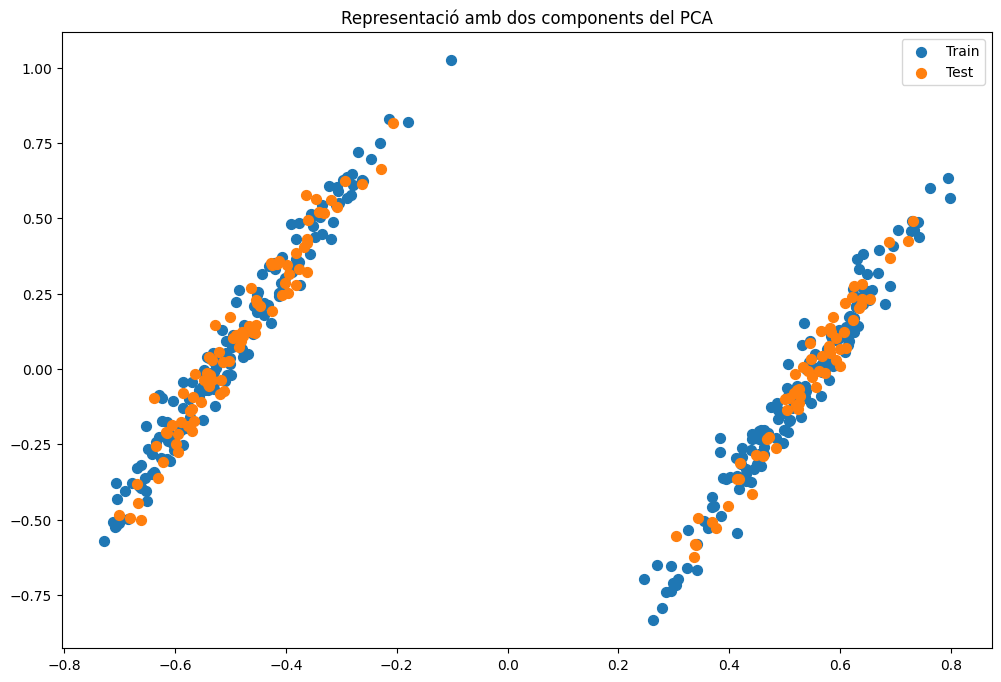

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=50, label="Train")
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], s=50, label="Test")
plt.title(f"Representació amb dos components del PCA")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure(data=
  [
    go.Scatter3d(x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2], mode='markers', marker=dict(color='orange'), name='Train'),
    go.Scatter3d(x=X_test_pca[:,0], y=X_test_pca[:,1], z=X_test_pca[:,2], mode='markers', marker=dict(color='cyan'), name='Test')
  ])
fig.update_layout(title='Representació amb tres components del PCA', scene=dict(aspectmode="cube"))
fig.show()

10. Entrena un model de regressió lineal ([LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) sobre les dades reduïdes a una certa dimensió


In [ ]:
n_dimensions = 3
reg = LinearRegression().fit(X_train_pca[:,:n_dimensions], y_train)
scoreTrain = reg.score(X_train_pca[:,:n_dimensions], y_train)
scoreTest = reg.score(X_test_pca[:,:n_dimensions], y_test)

print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

Accuracy de train = 39.10054698842512. Accuracy de test = 31.137884364340696


11. Millora el model afegint [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) amb un grau variable.

In [ ]:
grau = 2
n_dimensions = 3
poly = PolynomialFeatures(grau)
xTrain = poly.fit_transform(X_train_pca[:,:n_dimensions])
xTest = poly.transform(X_test_pca[:,:n_dimensions])
reg = LinearRegression().fit(xTrain, y_train)
scoreTrain = reg.score(xTrain, y_train)
scoreTest = reg.score(xTest, y_test)

print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

Accuracy de train = 43.76496675183701. Accuracy de test = 29.270407365392803


12. Fes que el grau i la dimensionalitat siguin paràmetres interactius usant sliders

In [ ]:
def func(n_dim, grau):
  poly = PolynomialFeatures(grau)
  xTrain = poly.fit_transform(X_train_pca[:,:n_dim])
  xTest = poly.transform(X_test_pca[:,:n_dim])
  reg = LinearRegression().fit(xTrain, y_train)
  scoreTrain = reg.score(xTrain, y_train)
  scoreTest = reg.score(xTest, y_test)

  print(f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}\n")
interact(func, n_dim=widgets.IntSlider(min=1, max=len(X_train_pca[0]), step=1), grau=widgets.IntSlider(min=1, max=15, step=1))

interactive(children=(IntSlider(value=1, description='n_dim', max=10, min=1), IntSlider(value=1, description='…

<function __main__.func(n_dim, grau)>

13. Per què l'accuracy es tan baixa en test? Overfitting de les dades d'entrenament

14. Visualitza la recta de regressió en dues dimensions (manté l'interactivitat del slider i el grau de PolynomialFeatures)

In [ ]:
def func(grau):
  # Hem de deixar només 1 dimensió per poder visualitzar la predicció en 2 dimensions
  n_dimensions = 1
  poly = PolynomialFeatures(grau)
  xTrain = poly.fit_transform(X_train_pca[:,:n_dimensions])
  xTest = poly.transform(X_test_pca[:,:n_dimensions])
  reg = LinearRegression().fit(xTrain, y_train)
  scoreTrain = reg.score(xTrain, y_train)
  scoreTest = reg.score(xTest, y_test)

  ### DO NOT TOUCH THIS BLOCK ###
  xspace = np.linspace(-1,1,1000)
  addends = []
  for pow, coef in zip(poly.powers_, reg.coef_):
    valuesPowered = [xspace**val for val in pow if val != 0]
    if len(valuesPowered) == 0: continue
    addends.append(np.prod(valuesPowered,axis=0)*coef)
  if len(addends) == 0:
    addends = np.zeros(len(xspace))
  elif len(addends) == 1:
    addends = addends[0]
  else:
    addends = np.sum(addends, axis=0)
  y = addends + reg.intercept_
  ### DO NOT TOUCH THIS BLOCK ###

  fig, ax = plt.subplots(figsize=(12,8))
  plt.scatter(X_train_pca[:,0], y_train, s=50, label="Train")
  plt.scatter(X_test_pca[:,0], y_test, s=50, label="Test")
  plt.plot(xspace,y,c="red")
  plt.title(f"Representació amb una component del PCA i polinomi amb grau = {grau}\n"+\
            f"Accuracy de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")
  plt.legend()
  plt.ylabel("Y")
  plt.ylim((0,375))
  plt.show()
interact(func, grau=widgets.IntSlider(min=1, max=24, step=1))

interactive(children=(IntSlider(value=1, description='grau', max=24, min=1), Output()), _dom_classes=('widget-…

<function __main__.func(grau)>

15. Prova altres models com [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) o [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) amb totes les components del PCA

Notar com no te perquè millorar usant models més potents

In [ ]:
svr = SVR(kernel='poly').fit(X_train_pca, y_train)
scoreTrain = svr.score(X_train_pca, y_train)
scoreTest = svr.score(X_test_pca, y_test)
print(f"Accuracy amb {svr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

rfr = RandomForestRegressor().fit(X_train_pca, y_train)
scoreTrain = rfr.score(X_train_pca, y_train)
scoreTest = rfr.score(X_test_pca, y_test)
print(f"Accuracy amb {rfr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

Accuracy amb SVR(kernel='poly') de train = 29.805085297795397. Accuracy de test = 22.323611351654737
Accuracy amb RandomForestRegressor() de train = 92.86060022471624. Accuracy de test = 31.1758545071268


16. Prova altres models com [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) o [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) amb totes les dades escalades sense aplicar el PCA

In [ ]:
svr = SVR(kernel='poly').fit(X_trainScaled, y_train)
scoreTrain = svr.score(X_trainScaled, y_train)
scoreTest = svr.score(X_testScaled, y_test)
print(f"Accuracy amb {svr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

rfr = RandomForestRegressor().fit(X_trainScaled, y_train)
scoreTrain = rfr.score(X_trainScaled, y_train)
scoreTest = rfr.score(X_testScaled, y_test)
print(f"Accuracy amb {rfr} de train = {scoreTrain*100}. Accuracy de test = {scoreTest*100}")

Accuracy amb SVR(kernel='poly') de train = 53.93747585066233. Accuracy de test = 38.94511323474894
Accuracy amb RandomForestRegressor() de train = 92.35741588837904. Accuracy de test = 30.192526947901122


17. Per què els resultats no són perfectes? No hem fet cap experimentació, els models tenen paràmetres que han de ser tunejats per obtenir resultats òptims. A vegades, un model concret no serà la millor opció i haurem de provar d'altres. En aquest cas, fins i tot la regressió lineal simple era millor en algun dels experiments.

18. Quin altre model podría anar molt bé en un problema com aquest de regressió? Xarxes neuronals, per exemple.

## Ejemplo extra


Código utilizando redes neuronales que obtiene un resultado aún mejor

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import R2Score

Xtrain = X_trainScaled
Xtest = X_testScaled
model = Sequential()
model.add(Dense(64, input_shape=(len(Xtrain.columns), ), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss="mse", metrics=['mse','mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                704       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain, y_train, epochs=200, validation_split=0.1)
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.show()

In [ ]:
y_trainPred = model.predict(Xtrain)
y_testPred = model.predict(Xtest)
metric = R2Score()
metric.update_state(np.array(y_train).reshape(-1,1), y_trainPred)
scoreTrain = metric.result().numpy()
metric.update_state(np.array(y_test).reshape(-1,1), y_testPred)
scoreTest = metric.result().numpy()
print(f"R2 score de train = {scoreTrain*100}. R2 score de test = {scoreTest*100}")

5/5 [==============================] - 0s 2ms/step
R2 score de train = 56.44681453704834. R2 score de test = 52.02256441116333


Referències interessants a mirar:
- https://playground.tensorflow.org/
- https://adamharley.com/nn_vis/
- https://projector.tensorflow.org/